# 80% Work Frequency Analysis and Visualization

## Basic look at vocab lists

In [2]:
for x in [alice, frankenstein, pride, shakespeare, gatsby]:
    classic = classic + x
print(f'Total words in all text vocab lists: {len(classic)}\n*Not including modern (Natural Language Corpus Data: n-gram) words')

Total words in all text vocab lists: 1983
*Not including modern (Natural Language Corpus Data: n-gram) words


In [3]:
classic_set = set(classic)
print(f'Total unique words in all text vocab lists: {len(classic_set)}\n*Not including modern (Natural Language Corpus Data: n-gram) words')

Total unique words in all text vocab lists: 1154
*Not including modern (Natural Language Corpus Data: n-gram) words


In [4]:
print(f'Total unique words needed for over 80% comprehension in all texts (n-gram list included): {len(classic_set) + len(n_gram)}')

Total unique words needed for over 80% comprehension in all texts (n-gram list included): 2154


In [5]:
print(f'Words that appear in all vocab lists (but not in n-gram list): \n{list(set(shakespeare) & set(gatsby)  & set(frankenstein) & set(alice) & set(two_cities) & set(pride))}')

Words that appear in all vocab lists (but not in n-gram list): 
['Poor', 'Gave', 'Hear', 'Cry', 'Door', 'Gone', 'Nothing', 'Came', 'Saw', 'Went', 'Eyes', 'Heard', 'Speak', 'Spoke', 'Rather', 'Took', 'Sister', 'Knew']


## What can a Pandas DataFrame tell us about the vocab lists?

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
texts = {"Text": ["Alice's Adventures in Wonderland", "Frankenstein", "The Great Gatsby", "Pride and Prejudice", "Shakespearean Cannon", "A Tale of Two Cities"],
        "Hundred Comprisal %":    [61.04, 55.33, 53.87, 59.80, 52.62, 55.64],
        "Hundred Overall %":      [3.92,  1.43,  1.67,  1.60,  0.39,  1.03],
        "~80% Comprehension":     [350,   900,   725,   525,   1025,   750],
        "Actual Comprehension %": [80.29, 80.13, 80.19, 80.54, 80.21, 80.24],
        "Vocab List":             [101,   542,   335,   221,   434,   350],
        "Overall Word Count":     [27675, 75265, 49921, 122757, 971373, 138015] }
#print(texts)
df = pd.DataFrame(texts)
df

,Text,Hundred Comprisal %,Hundred Overall %,~80% Comprehension,Actual Comprehension %,Vocab List,Overall Word Count
0,Alice's Adventures in Wonderland,61.04,3.92,350,80.29,101,27675
1,Frankenstein,55.33,1.43,900,80.13,542,75265
2,The Great Gatsby,53.87,1.67,725,80.19,335,49921
3,Pride and Prejudice,59.80,1.60,525,80.54,221,122757
4,Shakespearean Cannon,52.62,0.39,1025,80.21,434,971373
5,A Tale of Two Cities,55.64,1.03,750,80.24,350,138015


In [8]:
df.describe()

,Hundred Comprisal %,Hundred Overall %,~80% Comprehension,Actual Comprehension %,Vocab List,Overall Word Count
count,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000
mean,56.383333,1.673333,712.500000,80.266667,330.50000,230834.333333
std,3.331658,1.197742,245.331409,0.144037,155.24529,365211.944444
min,52.620000,0.390000,350.000000,80.130000,101.00000,27675.000000
25%,54.235000,1.130000,575.000000,80.195000,249.50000,56257.000000
50%,55.485000,1.515000,737.500000,80.225000,342.50000,99011.000000
75%,58.760000,1.652500,862.500000,80.277500,413.00000,134200.500000
max,61.040000,3.920000,1025.000000,80.540000,542.00000,971373.000000


## Vocab list data in graphs

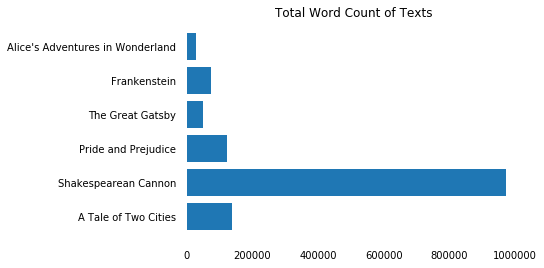

In [9]:
plt.figure()
plt.style.use('seaborn-notebook')
plt.barh(df["Text"], df["Overall Word Count"])
plt.title('Total Word Count of Texts')
plt.gca().invert_yaxis()
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=True)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

<Figure size 576x396 with 0 Axes>

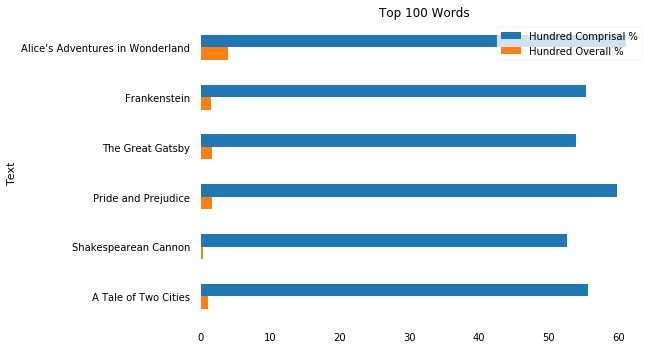

In [18]:
plt.figure()
plt.style.use('seaborn-notebook')
hundred = df.copy()
hundred.drop(["~80% Comprehension", "Actual Comprehension %", "Vocab List", "Overall Word Count"], axis=1, inplace=True)#.setindex("Text")
hundred.set_index("Text", inplace=True)
hundred.plot.barh()
plt.title('Top 100 Words')
plt.gca().invert_yaxis()
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=True)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

<Figure size 576x396 with 0 Axes>

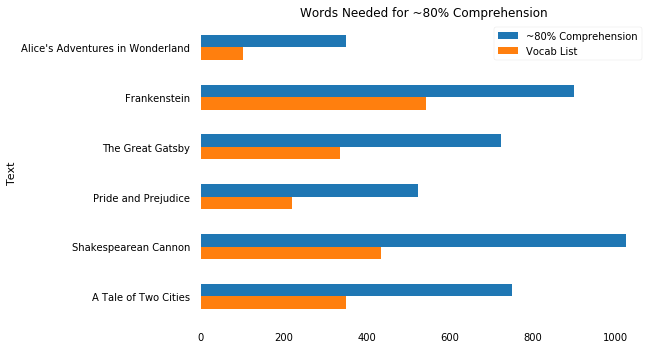

In [22]:
plt.figure()
plt.style.use('seaborn-notebook')
eighty = df.copy()
eighty.drop(["Hundred Comprisal %", "Hundred Overall %", "Overall Word Count", "Actual Comprehension %"], axis=1, inplace=True)#.setindex("Text")
eighty.set_index("Text", inplace=True)
eighty.plot.barh()
plt.title('Words Needed for ~80% Comprehension')
plt.gca().invert_yaxis()
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=True)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

## Other things to consider:
 - How would a base vocab list other than Natural Language Corpus Data n-gram change the number of vocab words per book?
 - How easily would this data pipeline transfer to languages other than English?
 - How could NLP (Natural Language Processing) assist this process?

In [ ]:
shakespeare = ['Thou', 'Thy', 'Thee', 'O', 'Lord', 'Sir', 'Hath', 'Speak', 'Mine', 'Father', 'Th', 'Doth', 'Hear', 'Son', 'Honour', 'Tis', 'Eyes', 'Fair', 'Cannot', 'Heaven', 'Lady', 'Fear', 'Sweet', 'Blood', 'Er', 'Brother', 'Nor', 'Leave', 'Thus', 'Stand', 'Bear', 'Noble', 'Comes', 'Master', 'Soul', 'Pray', 'Poor', 'Nothing', 'Dead', 'Hast', 'Daughter', 'Myself', 'Wife', 'Fool', 'Eye', 'Die', 'Hold', 'Gone', 'Hour', 'Thine', 'Bring', 'Himself', 'Woman', 'Mind', 'Till', 'Mother', 'Arm', 'Tongue', 'Answer', 'Dear', 'Fall', 'Whose', 'Sword', 'Thank', 'Peace', 'Forth', 'Matter', 'Rest', 'Fellow', 'Spirit', 'Ear', 'Tear', 'Unto', 'Letter', 'Hope', 'Therefore', 'Husband', 'Heard', 'Gentle', 'Reason', 'Indeed', 'Follow', 'Whom', 'Wrong', 'Crown', 'Kill', 'Boy', 'Wit', 'Thousand', 'Bed', 'Cause', 'Marry', 'Bid', 'Dost', 'Cry', 'Truth', 'Seem', 'Faith', 'Madam', 'Shame', 'Earth', 'Came', 'Hence', 'Grace', 'Ere', 'Ye', 'Shalt', 'Hither', 'False', 'Soldier', 'Gentleman', 'Lie', 'Rather', 'Fight', 'Ill', 'Grief', 'Ring', 'Honest', 'Youth', 'Fly', 'Enemy', 'Deed', 'Kind', 'Sleep', 'Saw', 'Queen', 'Fault', 'Mistress', 'Sea', 'Break', 'Wish', 'Villain', 'Lost', 'Ly', 'Fortune', 'Swear', 'Mad', 'Yourself', 'Sorrow', 'Sent', 'Pardon', 'Devil', 'Lay', 'Breath', 'Strange', 'Horse', 'Wind', 'Maid', 'Alone', 'Sit', 'Itself', 'Cousin', 'Seek', 'Morrow', 'Wilt', 'Told', 'Prove', 'Pity', 'Sight', 'Desire', 'Foul', 'Gave', 'Wear', 'Dy', 'Bloody', 'Worthy', 'Oath', 'Hang', 'Door', 'Worth', 'Sin', 'Ne', 'Em', 'Kiss', 'Grow', 'Purpose', 'Comfort', 'Draw', 'Cold', 'Weep', 'Strong', 'Fit', 'Beseech', 'Joy', 'Sister', 'Royal', 'Proud', 'Charge', 'Lose', 'Dare', 'Servant', 'Brought', 'Born', 'Loves', 'Late', 'Lives', 'Dog', 'Bound', 'Happy', 'Holy', 'Deny', 'Grave', 'Favour', 'Thyself', 'Command', 'Virtue', 'Foot', 'Pleasure', 'Appear', 'Ground', 'Uncle', 'Believe', 'Traitor', 'Serve', 'Warrant', 'Sake', 'Doubt', 'Lip', 'Praise', 'Mercy', 'Gracious', 'Ho', 'Mouth', 'Sing', 'Sad', 'Heavy', 'Hate', 'Goes', 'Dream', 'Cut', 'Suit', 'Farewell', 'Pass', 'Duty', 'Themselves', 'Hell', 'Sick', 'Knight', 'Knave', 'Vow', 'Neither', 'Drink', 'Certain', 'Patience', 'Merry', 'Wise', 'Rich', 'Colour', 'Knew', 'Pain', 'Touch', 'Begin', 'Lov', 'Haste', 'Trust', 'Deep', 'Blow', 'Wound', 'Eat', 'Voice', 'Cheek', 'Canst', 'Twenty', 'Manner', 'Brave', 'Worse', 'Lead', 'Gentlemen', 'Toward', 'Took', 'Bosom', 'Tender', 'Walk', 'Hair', 'Straight', 'Valiant', 'Sovereign', 'Prince', 'En', 'Presently', 'Yield', 'Wonder', 'Bold', 'Coming', 'Almost', 'Soon', 'Counsel', 'Wall', 'Morning', 'Justice', 'Didst', 'Woe', 'Flesh', 'Spoke', 'Carry', 'Trumpet', 'Withal', 'Brain', 'Tonight', 'Oft', 'Sport', 'Pale', 'Liege', 'Beat', 'Strength', 'Humour', 'Chamber', 'Prayer', 'Mock', 'Met', 'Glad', 'Revenge', 'Fell', 'Behold', 'Ten', 'Sworn', 'Slave', 'Ready', 'Heir', 'Speech', 'Rage', 'Murder', 'Gives', 'Drop', 'Pluck', 'Passion', 'Moon', 'Flower', 'Slain', 'Sense', 'Prisoner', 'Deliver', 'Lordship', 'Drum', 'Confess', 'Win', 'Scorn', 'Lack', 'Lion', 'Labour', 'Honourable', 'Attend', 'Sigh', 'Truly', 'Strike', 'Loving', 'Danger', 'Brow', 'Respect', 'Plain', 'Ha', 'Pretty', 'Lover', 'Jest', 'Conscience', 'Breast', 'Vile', 'Marriage', 'Fortunes', 'Suffer', 'Feast', 'De', 'Behind', 'Entreat', 'Affection', 'Hundred', 'Harm', 'Fashion', 'Wouldst', 'Tale', 'Pride', 'Offence', 'Coward', 'Weak', 'Laugh', 'Worship', 'Mighty', 'Guard', 'Chance', 'Treason', 'Tent', 'Longer', 'Burn', 'Battle', 'Valour', 'Quarrel', 'Finger', 'Twas', 'Leg', 'Hurt', 'Hide', 'Beast', 'Throw', 'Ourselves', 'Mortal', 'Worst', 'Witness', 'Shadow', 'Promise', 'Excellent', 'Beard', 'Presence', 'Kept', 'Grant', 'Cast', 'Remain', 'Noise', 'Glory', 'Curse', 'Majesty', 'Bless', 'Went', 'Prithee', 'Fetch', 'Army', 'Understand', 'Poison', 'Beg', 'Writ', 'Wisdom', 'Seal', 'Dangerous', 'Cross', 'Woo', 'Won', 'Wing', 'Takes', 'Anything', 'Angry', 'Troth', 'Teach', 'Herself', 'Fine', 'Birth']
gatsby = ['Came', 'Went', 'Eyes', 'Looked', 'Didn', 'Don', 'Moment', 'Door', 'Turned', 'Voice', 'Knew', 'Saw', 'Toward', 'Began', 'Sport', 'Took', 'Hour', 'Told', 'Heard', 'Afternoon', 'Asked', 'Seemed', 'Cry', 'Wasn', 'Minute', 'Nothing', 'Alone', 'Suddenly', 'Sat', 'Clock', 'Morning', 'Himself', 'Stood', 'Garage', 'Couldn', 'Arm', 'Wanted', 'Lawn', 'O', 'Moved', 'Inquired', 'Gave', 'Marry', 'Dark', 'Across', 'Rather', 'Felt', 'Demanded', 'Anything', 'Wife', 'Walked', 'Matter', 'Hear', 'Gone', 'Feet', 'Dog', 'Broke', 'Hair', 'Wouldn', 'Woman', 'Rose', 'Hadn', 'Chair', 'Beside', 'Stopped', 'Met', 'Loved', 'Butler', 'Trying', 'Train', 'Telephone', 'Summer', 'Idea', 'Evening', 'Dress', 'Shoulder', 'Passed', 'Ought', 'Itself', 'Inside', 'Hundred', 'Happened', 'Grey', 'Dozen', 'Brought', 'Behind', 'Talked', 'Suit', 'Slowly', 'Shook', 'Rain', 'Opened', 'Myself', 'Fell', 'Except', 'Coat', 'Answered', 'Almost', 'Waited', 'Sent', 'Porch', 'Nodded', 'Mckee', 'Insisted', 'Immediately', 'Hall', 'Expression', 'Bright', 'Bought', 'Believe', 'Bed', 'Arrived', 'Won', 'Stared', 'Standing', 'Somebody', 'Sitting', 'Reached', 'Quickly', 'Outside', 'Leaned', 'Laughed', 'Isn', 'Husband', 'Glanced', 'Followed', 'Floor', 'Finger', 'Drove', 'Understand', 'Trees', 'Tomorrow', 'Suggested', 'Speak', 'Sister', 'Pretty', 'Policeman', 'Pale', 'Mouth', 'Longer', 'Hurry', 'Held', 'Heat', 'Explained', 'Effort', 'Dream', 'Doesn', 'Corner', 'Cool', 'Cold', 'Wind', 'Whispered', 'Smiled', 'Sight', 'Ran', 'Pulled', 'Pool', 'Nice', 'Lunch', 'Leaving', 'Lay', 'Late', 'Grass', 'Forward', 'Dinner', 'Deep', 'Continued', 'Certain', 'Boy', 'Wait', 'Surprised', 'Suppose', 'Somewhere', 'Shadow', 'Remarked', 'Raised', 'Perhap', 'Nose', 'Movement', 'Mine', 'Laughter', 'Lady', 'Kind', 'Killed', 'Kept', 'Haven', 'Happen', 'Forever', 'Faces', 'Drink', 'Dead', 'Curious', 'Crowd', 'Crazy', 'Coupã', 'Wet', 'Warm', 'Wall', 'Voices', 'Tea', 'Sit', 'Silver', 'Sick', 'Saying', 'Rest', 'Repeated', 'Mind', 'Lost', 'Lived', 'Lip', 'Leave', 'Glad', 'Flower', 'Fifty', 'Enormous', 'Couch', 'Breath', 'Beyond', 'Asleep', 'Wild', 'Wheel', 'Turning', 'Trembling', 'Thirty', 'Talking', 'Spoke', 'Someone', 'Romantic', 'Remembered', 'Remark', 'Rang', 'Object', 'Newspaper', 'Murmur', 'Moving', 'Move', 'Mother', 'Lovely', 'Guest', 'Glass', 'Funny', 'Forgotten', 'Forget', 'Fine', 'Finally', 'Faintly', 'Eat', 'Ear', 'Dust', 'Driving', 'Conversation', 'Coming', 'Coloured', 'Chauffeur', 'Broken', 'Apartment', 'Anyone', 'Anyhow', 'Yard', 'Wonder', 'Wire', 'Whose', 'Whom', 'Walking', 'Upstair', 'Unfamiliar', 'Twilight', 'Trouble', 'Touch', 'Taxi', 'Stayed', 'Station', 'Stand', 'Slightly', 'Sleep', 'Sky', 'Silence', 'Shirt', 'Sery', 'Scene', 'Rich', 'Presence', 'Poor', 'Pocket', 'Pause', 'Occurred', 'Names', 'Named', 'Moon', 'Letter', 'Laugh', 'Kitchen', 'Hesitated', 'Hardly', 'Feeling', 'Familiar', 'Exclaimed', 'Everyone', 'Eagerly', 'Drunk', 'Drew', 'Darkness', 'Colour', 'Changed', 'Carry', 'Became', 'Aware', 'Answer', 'Agreed', 'Afraid', 'Affair', 'Thinking', 'Thin', 'Thick', 'Terrible', 'Taking', 'Supper', 'Strained', 'Sometimes', 'Soft', 'Smile', 'Silent', 'Shape', 'Secret', 'Sad', 'Reason', 'Quite', 'Pushed', 'Politely', 'Physical', 'Pair', 'Opening', 'Noon', 'Neighbour', 'Invited']
pride =  ['Sister', 'Herself', 'Soon', 'Nothing', 'Dear', 'Manner', 'Mother', 'Father', 'Daughter', 'Letter', 'Lady', 'Himself', 'Feeling', 'Hope', 'Cannot', 'Saw', 'Marry', 'Felt', 'Wish', 'Quite', 'Myself', 'Attention', 'Pleasure', 'Cry', 'Came', 'Till', 'Heard', 'Aunt', 'Whom', 'Believe', 'Morning', 'Moment', 'Happy', 'Brother', 'Anything', 'Evening', 'Opinion', 'Indeed', 'Therefore', 'Looked', 'Ill', 'Hear', 'Happiness', 'Toward', 'Uncle', 'Told', 'Speak', 'Went', 'Character', 'Seemed', 'Nor', 'Marriage', 'Answer', 'Hour', 'Certainly', 'Leave', 'Kind', 'Gone', 'Conversation', 'Affection', 'Woman', 'Passed', 'Mind', 'Coming', 'Seeing', 'Immediately', 'Cousin', 'Whose', 'Began', 'Knew', 'Almost', 'Perhap', 'Reason', 'Rather', 'Object', 'Behaviour', 'Walk', 'Husband', 'Gave', 'Certain', 'Took', 'Eyes', 'Acquaintance', 'Continued', 'Yourself', 'Idea', 'Civility', 'Suppose', 'Spirit', 'Settled', 'Regard', 'Particular', 'Wife', 'Perfectly', 'Occasion', 'Hardly', 'Satisfy', 'Returned', 'Pride', 'Ought', 'Agreeable', 'Walked', 'Longer', 'Honour', 'Carriage', 'Turned', 'Spoke', 'Scarcely', 'Expected', 'Door', 'Ball', 'Ladyship', 'Impossible', 'Wished', 'Rest', 'Dare', 'Asked', 'Talking', 'Officer', 'Met', 'Gentleman', 'Fortune', 'Former', 'Doubt', 'De', 'Convinced', 'Assure', 'Talked', 'Situation', 'Seem', 'Sat', 'Pleased', 'Likely', 'Gentlemen', 'Connection', 'Wonder', 'Matter', 'Handsome', 'Glad', 'Engaged', 'Dinner', 'Brought', 'Believed', 'Afraid', 'Surprise', 'Sense', 'Expect', 'Entered', 'Compliment', 'Amiable', 'Surprised', 'Saying', 'Respect', 'Relation', 'Invitation', 'Comfort', 'Beyond', 'Wishes', 'Usual', 'Thousand', 'Themselves', 'Sorry', 'Silence', 'Expression', 'Everybody', 'Deal', 'Concern', 'Answered', 'Advantage', 'Speaking', 'Neither', 'Fear', 'Enquiry', 'Appearance', 'Appear', 'Sometimes', 'Sensible', 'Particularly', 'Pain', 'Merely', 'Length', 'Fine', 'Engagement', 'Determined', 'Dance', 'Consequence', 'Afterward', 'Ten', 'Servant', 'Resolved', 'Necessary', 'Instantly', 'Equal', 'Consider', 'Appeared', 'Understand', 'Poor', 'Opportunity', 'Neighbourhood', 'Mention', 'Master', 'Exactly', 'Countenance', 'Arrival', 'Alone', 'Younger', 'Smile', 'Obliged', 'Lost', 'Kindness', 'Forward', 'Astonishment', 'Whatever', 'Satisfaction', 'Mentioned', 'Meant', 'Joined', 'Highly', 'Endeavour', 'Circumstances', 'Attachment']
frankenstein =  ['Myself', 'Father', 'Eyes', 'Feeling', 'Toward', 'Saw', 'Mind', 'Whom', 'Felt', 'Passed', 'Dear', 'Spirit', 'Misery', 'Miserable', 'Heard', 'Became', 'Soon', 'Hour', 'Appeared', 'Mountain', 'Moment', 'Indeed', 'Horror', 'Cottage', 'Whose', 'Thus', 'Manner', 'Hope', 'Happiness', 'Fear', 'Affection', 'Despair', 'Voice', 'Cannot', 'Happy', 'Sensation', 'Scene', 'Creature', 'Alone', 'Ice', 'Joy', 'Companion', 'Came', 'Letter', 'Soul', 'Countenance', 'Wood', 'Poor', 'Entered', 'Therefore', 'Tear', 'Sometimes', 'Pleasure', 'Morning', 'Himself', 'Almost', 'Took', 'Seemed', 'Rest', 'Possessed', 'Kind', 'Journey', 'Earth', 'Delight', 'Wind', 'Gentle', 'Remain', 'Discovered', 'Continued', 'Cause', 'Object', 'Mother', 'Monster', 'Idea', 'Fiend', 'Fellow', 'Tale', 'Sea', 'Remained', 'Lost', 'Labour', 'Knew', 'Gave', 'Believe', 'Strange', 'Sight', 'Returned', 'Resolved', 'Nor', 'Heaven', 'Existence', 'Enemy', 'Beheld', 'Thousand', 'Peace', 'Passion', 'Nothing', 'Loved', 'Dream', 'Cold', 'Appearance', 'Agony', 'Reflection', 'Nearly', 'Looked', 'Grief', 'Brother', 'Arrived', 'Appear', 'Yourself', 'Placed', 'Native', 'Mine', 'Lay', 'Endeavoured', 'Desire', 'Dark', 'Brought', 'Began', 'Rather', 'Occupy', 'Murderer', 'Length', 'Kindness', 'Hardly', 'Greatest', 'Beautiful', 'Wonder', 'Stranger', 'Sister', 'Quickly', 'Perceived', 'Lovely', 'Imagination', 'Ground', 'Expressed', 'Evil', 'Attention', 'Spoke', 'Spent', 'Seek', 'Sat', 'Rage', 'Greater', 'Dy', 'Door', 'Discovery', 'Desired', 'Creatures', 'Cousin', 'Wretch', 'Woman', 'Turned', 'Revenge', 'Path', 'Pain', 'Fixed', 'Die', 'Degree', 'Cottager', 'Beloved', 'Wretched', 'Wish', 'Sympathy', 'Suddenly', 'Longer', 'Lived', 'Hopes', 'Filled', 'Endured', 'Destroyed', 'Dead', 'Concerning', 'Anguish', 'Sweet', 'Quitted', 'Promise', 'Murder', 'Itself', 'Followed', 'Duty', 'Youth', 'Vengeance', 'Unable', 'Suffered', 'Spot', 'Sleep', 'Observed', 'Moon', 'Leave', 'Formed', 'Destruction', 'Creation', 'Cloud', 'Bound', 'Answer', 'Wished', 'Went', 'Victim', 'Vessel', 'Trees', 'Sufficient', 'Pursuit', 'Perhap', 'Murdered', 'Ill', 'Entirely', 'Dã', 'Drew', 'Destroy', 'Deeply', 'Conversation', 'Calm', 'Allowed', 'Acquainted', 'Task', 'Suffering', 'Sorrow', 'Son', 'Satisfy', 'Sank', 'Progress', 'Occupation', 'Mon', 'Learned', 'Innocent', 'Forth', 'Exclaimed', 'Endeavour', 'Deep', 'Dared', 'Cry', 'Creator', 'Boat', 'Blood', 'Approached', 'Unhappy', 'Thy', 'Surrounded', 'Sought', 'Snow', 'Secret', 'Rendered', 'Reflect', 'Purpose', 'Proceeded', 'Opened', 'Necessary', 'Melancholy', 'Lip', 'Led', 'Innocence', 'Fell', 'Fate', 'Eye', 'Engaged', 'Endure', 'Easily', 'Determined', 'Departure', 'Covered', 'Courage', 'Continually', 'Consolation', 'Wonderful', 'Visited', 'Speak', 'Retired', 'Quit', 'Pursue', 'Misfortunes', 'Expression', 'Danger', 'Afterward', 'Across', 'Wept', 'Walked', 'Union', 'Understand', 'Sky', 'Shore', 'Seized', 'Scenes', 'Rose', 'Restored', 'Rain', 'Pass', 'Overcome', 'Names', 'Misfortune', 'Instrument', 'Instantly', 'Hear', 'Extreme', 'Effect', 'Discover', 'Dearest', 'Crime', 'Bitter', 'Bed', 'Asked', 'Wild', 'Voyage', 'Unfortunate', 'Toil', 'Strength', 'Solitude', 'Smiles', 'Silent', 'Reflected', 'Prospect', 'Presence', 'Philosophy', 'Marriage', 'Limb', 'Hovel', 'Horrible', 'Distance', 'Desert', 'Describe', 'Departed', 'Daughter', 'Awoke', 'Arm', 'Accompany', 'Wretchedness', 'Waves', 'Wandered', 'Understood', 'Truth', 'Tranquillity', 'Told', 'Thou', 'Thirst', 'Silence', 'Render', 'Remorse', 'Recovered', 'Reason', 'Protector', 'Paused', 'Moved', 'Instant', 'Ideas', 'Herself', 'Hatred', 'Frame', 'Forward', 'Former', 'Fancy', 'Devoted', 'Darkness', 'Curiosity', 'Circumstances', 'Capable', 'Bestow', 'Benevolent', 'Amiable', 'Agitation', 'Admiration', 'Watching', 'Vain', 'Undertaking', 'Threw', 'Surprised', 'Summit', 'Sledge', 'Situation', 'Servant', 'Scarcely', 'Remembered', 'Pursued', 'Promised', 'Prison', 'Presented', 'Pity', 'Parent', 'Ought', 'Mighty', 'Magistrate', 'Latter', 'Hill', 'Gone', 'Gained', 'Frightful', 'Feet', 'Feared', 'Favourite', 'Exertion', 'Excellent', 'Enjoyed', 'Employed', 'Doubt', 'Disposition', 'Directed', 'Difficulty', 'Dare', 'Crimes', 'Commence', 'Cheek', 'Carry', 'Bestowed', 'Believed', 'Attempt', 'Ardour', 'Animal', 'Allow', 'Addressed', 'Winter', 'Weep', 'Virtue', 'Village', 'Torture', 'Themselves', 'Success', 'Spring', 'Sense', 'Season', 'Recollection', 'Professor', 'Produced', 'Pleasant', 'Occasion', 'Obliged', 'Master', 'Listened', 'Lady', 'Justice', 'Inhabitant', 'Increased', 'Hunger', 'Hitherto', 'Greatly', 'Fled', 'Fatigue', 'Fair', 'Expected', 'Excited', 'Evening', 'Ear', 'Dreadful', 'Divine', 'Degrees', 'Consent', 'Conceived', 'Committed', 'Cheerful', 'Cast', 'Broken', 'Branches', 'Behold', 'Arrive', 'Apply', 'Wife', 'Warmth', 'Vast', 'Utterly', 'Utter', 'Trial', 'Trembled', 'Threat', 'Terror', 'Superior', 'Suffer', 'Specy', 'Shut', 'Ruin', 'Round', 'Reality', 'Rapidly', 'Peasant', 'Ocean', 'Noble', 'Mankind', 'Longed', 'Leaves', 'Incident', 'Honour', 'Hair', 'Guilty', 'Gloom', 'Gazed', 'Fresh', 'Experienced', 'Except', 'Eternal', 'Enthusiasm', 'Enjoyment', 'Emotion', 'Dry', 'Devil', 'Detail', 'Destiny', 'Demand', 'Considered', 'Condemned', 'Compassion', 'Certainly', 'Ceased', 'Beneath', 'Behind', 'Assured', 'Afford', 'Accident', 'Abhorred', 'Violence', 'Thee', 'Terrible', 'Surely', 'Supposed', 'Struck', 'Stream', 'Storm', 'Stood', 'Solitary', 'Sides', 'Shone', 'Sailor', 'Sad', 'Rushed', 'Returning', 'Resolution', 'Residence', 'Repose', 'Remembrance', 'Procure', 'Pressed', 'Poverty', 'Persuade', 'Modern', 'Lover', 'Listen', 'Instead', 'Ignorant', 'Hurry', 'Hideous', 'Hell', 'Guilt', 'Gloomy', 'Gentleness', 'Forget', 'Follow']
alice = ['Went', 'Herself', 'Began', 'Quite', 'Don', 'Voice', 'Looked', 'Round', 'Tone', 'Came', 'Re', 'Door', 'Moment', 'Heard', 'Dear', 'Nothing', 'Eyes', 'Seemed', 'Won', 'Rather', 'Poor', 'Took', 'Soon', 'Cry', 'Cat', 'Felt', 'Hurry', 'Wish', 'Till', 'Minute', 'Arm', 'Jury', 'Feet', 'Eat', 'Curious', 'Anything', 'Wonder', 'Tea', 'Spoke', 'Sat', 'Asked', 'Turned', 'Talking', 'Ran', 'Hastily', 'Doesn', 'Begin', 'Saying', 'Pig', 'Knew', 'Indeed', 'Idea', 'Gave', 'Trying', 'Sea', 'Saw', 'Perhap', 'Ought', 'Mouth', 'Mad', 'Itself', 'Hear', 'Beginning', 'Anxiously', 'Speak', 'Seem', 'Remark', 'Lesson', 'Kept', 'Happen', 'Grow', 'Gone', 'Dance', 'Cook', 'Certainly', 'Behind', 'Turning', 'Tail', 'Suppose', 'Suddenly', 'Queer', 'Mouse', 'Finished', 'Deal', 'Afraid', 'Wasn', 'Waited', 'Soldier', 'Sister', 'Silence', 'Matter', 'Hardly', 'Growing', 'Gloves', 'Glad', 'Ear', 'Conversation', 'Bird', 'Yourself', 'Witness', 'Walked']
two_cities = ['Himself', 'Looked', 'Father', 'Prisoner', 'Eyes', 'Door', 'Came', 'Nothing', 'Mind', 'Wine', 'Turned', 'Dear', 'Arm', 'Went', 'Took', 'Don', 'Sat', 'Wife', 'Husband', 'Sir', 'Manner', 'Hour', 'Stood', 'Moment', 'Prison', 'Dark', 'Asked', 'Saw', 'Poor', 'Cry', 'Knew', 'Voice', 'Hope', 'Brought', 'Returned', 'Woman', 'Gentleman', 'Daughter', 'Gone', 'Whom', 'Passed', 'Lay', 'Wall', 'Brother', 'Strong', 'Round', 'Madame', 'Hair', 'Corner', 'Quite', 'Heard', 'Stopped', 'Spy', 'Lady', 'Seemed', 'Myself', 'Dead', 'Toward', 'Carry', 'Mother', 'Breast', 'Speak', 'Morning', 'Held', 'Anything', 'Faces', 'Coach', 'Behind', 'Finger', 'Bed', 'Answered', 'Answer', 'Laid', 'Alone', 'Village', 'Struck', 'Stone', 'Carriage', 'Soon', 'Hold', 'Hear', 'Fellow', 'Shadow', 'Opened', 'Itself', 'Coming', 'Usual', 'Mender', 'Began', 'Lip', 'Monde', 'Ll', 'Evrã', 'Doubt', 'Whose', 'Told', 'Passenger', 'Letter', 'Kind', 'Believe', 'Rest', 'Repeated', 'Kept', 'Feet', 'Dropped', 'Crowd', 'Citizen', 'Boy', 'Walked', 'Reason', 'Matter', 'Knitting', 'Yourself', 'Sight', 'Secret', 'Hundred', 'Guard', 'Fountain', 'Fell', 'Chair', 'Rather', 'Observed', 'Moved', 'Lost', 'Herself', 'Ground', 'Taking', 'Quiet', 'Horses', 'Hill', 'Almost', 'Spoke', 'Heavy', 'Cannot', 'Slowly', 'Morrow', 'Leave', 'Shoulder', 'Perhap', 'Lamp', 'Expression', 'Courtyard', 'Cap', 'Bear', 'Across', 'Tear', 'Sea', 'Followed', 'Ear', 'Blood', 'Ready', 'Mine', 'Confidence', 'Silence', 'Rose', 'Pretty', 'Hurry', 'Wood', 'Golden', 'Gate', 'Fear', 'Became', 'Spoken', 'Raised', 'Patriot', 'Influence', 'Glass', 'Eye', 'Earth', 'Cold', 'Clock', 'Certain', 'Shook', 'O', 'Dog', 'Danger', 'Closed', 'Appearance', 'Twenty', 'Straight', 'Standing', 'Sister', 'Rising', 'Ran', 'Object', 'Nor', 'Honour', 'Happy', 'Gave', 'Evening', 'Drinking', 'Beyond', 'Wild', 'Understand', 'Turning', 'Touch', 'Tone', 'Stair', 'Sometimes', 'Pass', 'Indeed', 'Forward', 'Fine', 'Echoes', 'Chateau', 'Bring', 'Witness', 'Thousand', 'Seat', 'Pity', 'Occasion', 'Mouth', 'Dress', 'Bright', 'Bent', 'Wish', 'Themselves', 'Showed', 'Saying', 'Remained', 'Journey', 'Creature', 'Bell', 'Afterward', 'Strange', 'Stand', 'Smile', 'Sense', 'Sake', 'Pursued', 'Purpose', 'Nephew', 'Horse', 'Foot', 'Floor', 'Felt', 'Fallen', 'Dreadful', 'Thank', 'Stones', 'Staircase', 'Sky', 'Shut', 'Seven', 'Seem', 'Passing', 'Length', 'Iron', 'Happened', 'Gentlemen', 'Gaoler', 'Forehead', 'Fancy', 'Duty', 'Die', 'Deep', 'Darkness', 'Counter', 'Aside', 'Wrong', 'Worked', 'Wind', 'Spot', 'Spirit', 'Particular', 'Otherwise', 'Mere', 'Late', 'Forth', 'Dy', 'Distance', 'Condition', 'Circumstances', 'Changed', 'Worth', 'Worn', 'Whisper', 'Soul', 'Sleep', 'Pocket', 'Miss', 'Marry', 'Lying', 'Lives', 'Jury', 'Favour', 'Fair', 'Except', 'Dust', 'Conversation', 'Colour', 'Character', 'Broken', 'Breath', 'Beside', 'Asleep', 'Appeared', 'Wore', 'Touched', 'Straw', 'Son', 'Soldier', 'Sitting', 'Released', 'Heap', 'Entered', 'Direction', 'Chamber', 'Bench', 'Attention', 'Worse', 'Ways', 'Walking', 'Vain', 'Tower', 'Thrown', 'Suddenly', 'Servant', 'Safe', 'Remarkable', 'Rain', 'Presented', 'Pieces', 'Outside', 'Lighted', 'Immediately', 'Houses', 'Honest', 'Fall', 'Emigrant', 'Drink', 'Drawing', 'Drank', 'Clothes', 'Caught', 'Bread', 'Arose', 'Wot', 'Worst', 'Wig', 'Tumbril', 'Truth', 'Tree', 'Travelling', 'Touching', 'Ten', 'Suppose', 'Softly', 'Slight', 'Silent']
n_gram = ['The', 'Of', 'And', 'To', 'A', 'In', 'For', 'Is', 'On', 'That', 'By', 'This', 'With', 'I', 'You', 'It', 'Not', 'Or', 'Be', 'Are', 'From', 'At', 'As', 'Your', 'All', 'Have', 'New', 'More', 'An', 'Was', 'We', 'Will', 'Home', 'Can', 'Us', 'About', 'If', 'Page', 'My', 'Has', 'Search', 'Free', 'But', 'Our', 'One', 'Other', 'Do', 'No', 'Information', 'Time', 'They', 'Site', 'He', 'Up', 'May', 'What', 'Which', 'Their', 'News', 'Out', 'Use', 'Any', 'There', 'See', 'Only', 'So', 'His', 'When', 'Contact', 'Here', 'Business', 'Who', 'Web', 'Also', 'Now', 'Help', 'Get', 'Pm', 'View', 'Online', 'First', 'Am', 'Been', 'Would', 'How', 'Were', 'Me', 'Services', 'Some', 'These', 'Click', 'Its', 'Like', 'Service', 'Than', 'Find', 'Price', 'Date', 'Back', 'Top', 'People', 'Had', 'List', 'Name', 'Just', 'Over', 'State', 'Year', 'Day', 'Into', 'Email', 'Two', 'Health', 'World', 'Next', 'Used', 'Go', 'Work', 'Last', 'Most', 'Products', 'Music', 'Buy', 'Data', 'Make', 'Them', 'Should', 'Product', 'System', 'Post', 'Her', 'City', 'Add', 'Policy', 'Number', 'Such', 'Please', 'Available', 'Copyright', 'Support', 'Message', 'After', 'Best', 'Software', 'Then', 'Jan', 'Good', 'Video', 'Well', 'Where', 'Info', 'Rights', 'Public', 'Books', 'High', 'School', 'Through', 'Each', 'Links', 'She', 'Review', 'Years', 'Order', 'Very', 'Privacy', 'Book', 'Items', 'Company', 'Read', 'Group', 'Need', 'Many', 'User', 'Said', 'Does', 'Set', 'Under', 'General', 'Research', 'University', 'January', 'Mail', 'Full', 'Map', 'Reviews', 'Program', 'Life', 'Know', 'Games', 'Way', 'Days', 'Management', 'Part', 'Could', 'Great', 'United', 'Hotel', 'Real', 'Item', 'International', 'Center', 'Must', 'Store', 'Travel', 'Comments', 'Made', 'Development', 'Report', 'Off', 'Member', 'Details', 'Line', 'Terms', 'Before', 'Hotels', 'Did', 'Send', 'Right', 'Type', 'Because', 'Local', 'Those', 'Using', 'Results', 'Office', 'Education', 'National', 'Car', 'Design', 'Take', 'Posted', 'Internet', 'Address', 'Community', 'Within', 'States', 'Area', 'Want', 'Phone', 'Dvd', 'Shipping', 'Reserved', 'Subject', 'Between', 'Forum', 'Family', 'Long', 'Based', 'Code', 'Show', 'Even', 'Black', 'Check', 'Special', 'Prices', 'Website', 'Index', 'Being', 'Women', 'Much', 'Sign', 'File', 'Link', 'Open', 'Today', 'Technology', 'South', 'Case', 'Project', 'Same', 'Pages', 'Uk', 'Version', 'Section', 'Own', 'Found', 'Sports', 'House', 'Related', 'Security', 'Both', 'County', 'American', 'Photo', 'Game', 'Members', 'Power', 'While', 'Care', 'Network', 'Down', 'Computer', 'Systems', 'Three', 'Total', 'Place', 'End', 'Following', 'Download', 'Him', 'Without', 'Per', 'Access', 'Think', 'North', 'Resources', 'Current', 'Posts', 'Big', 'Media', 'Law', 'Control', 'Water', 'History', 'Pictures', 'Size', 'Art', 'Personal', 'Since', 'Including', 'Guide', 'Shop', 'Directory', 'Board', 'Location', 'Change', 'White', 'Text', 'Small', 'Rating', 'Rate', 'Government', 'Children', 'During', 'Usa', 'Return', 'Students', 'Shopping', 'Account', 'Times', 'Sites', 'Level', 'Digital', 'Profile', 'Previous', 'Form', 'Events', 'Love', 'Old', 'Main', 'Call', 'Hours', 'Image', 'Department', 'Title', 'Description', 'Non', 'Insurance', 'Another', 'Why', 'Shall', 'Property', 'Class', 'Cd', 'Still', 'Money', 'Quality', 'Every', 'Listing', 'Content', 'Country', 'Private', 'Little', 'Visit', 'Save', 'Tools', 'Low', 'Reply', 'Customer', 'December', 'Compare', 'Movies', 'Include', 'College', 'Value', 'Article', 'Man', 'Card', 'Jobs', 'Provide', 'Food', 'Source', 'Author', 'Different', 'Press', 'Learn', 'Sale', 'Around', 'Print', 'Course', 'Job', 'Canada', 'Process', 'Teen', 'Room', 'Stock', 'Training', 'Too', 'Credit', 'Point', 'Join', 'Science', 'Men', 'Categories', 'Advanced', 'West', 'Sales', 'Look', 'English', 'Left', 'Team', 'Estate', 'Box', 'Conditions', 'Select', 'Windows', 'Photos', 'Gay', 'Thread', 'Week', 'Category', 'Note', 'Live', 'Large', 'Gallery', 'Table', 'Register', 'However', 'June', 'October', 'November', 'Market', 'Library', 'Really', 'Action', 'Start', 'Series', 'Model', 'Features', 'Air', 'Industry', 'Plan', 'Human', 'Provided', 'Tv', 'Yes', 'Required', 'Second', 'Hot', 'Accessories', 'Cost', 'Movie', 'Forums', 'March', 'La', 'September', 'Better', 'Say', 'Questions', 'July', 'Yahoo', 'Going', 'Medical', 'Test', 'Friend', 'Come', 'Dec', 'Server', 'Pc', 'Study', 'Application', 'Cart', 'Staff', 'Articles', 'Feedback', 'Again', 'Play', 'Looking', 'Issues', 'April', 'Never', 'Users', 'Complete', 'Street', 'Topic', 'Comment', 'Financial', 'Things', 'Working', 'Against', 'Standard', 'Tax', 'Person', 'Below', 'Mobile', 'Less', 'Got', 'Blog', 'Party', 'Payment', 'Equipment', 'Login', 'Student', 'Let', 'Programs', 'Offers', 'Legal', 'Above', 'Recent', 'Park', 'Stores', 'Side', 'Act', 'Problem', 'Red', 'Give', 'Memory', 'Performance', 'Social', 'August', 'Quote', 'Language', 'Story', 'Sell', 'Options', 'Experience', 'Rates', 'Create', 'Key', 'Body', 'Young', 'America', 'Important', 'Field', 'Few', 'East', 'Paper', 'Single', 'Age', 'Activities', 'Club', 'Example', 'Girls', 'Additional', 'Password', 'Latest', 'Something', 'Road', 'Gift', 'Question', 'Changes', 'Night', 'Ca', 'Hard', 'Texas', 'Oct', 'Pay', 'Four', 'Poker', 'Status', 'Browse', 'Issue', 'Range', 'Building', 'Seller', 'Court', 'February', 'Always', 'Result', 'Audio', 'Light', 'Write', 'War', 'Nov', 'Offer', 'Blue', 'Groups', 'Al', 'Easy', 'Given', 'Files', 'Event', 'Release', 'Analysis', 'Request', 'Fax', 'China', 'Making', 'Picture', 'Needs', 'Possible', 'Might', 'Professional', 'Yet', 'Month', 'Major', 'Star', 'Areas', 'Future', 'Space', 'Committee', 'Hand', 'Sun', 'Cards', 'Problems', 'London', 'Washington', 'Meeting', 'Become', 'Interest', 'Id', 'Child', 'Keep', 'Enter', 'California', 'Share', 'Similar', 'Garden', 'Schools', 'Million', 'Added', 'Reference', 'Companies', 'Listed', 'Baby', 'Learning', 'Energy', 'Run', 'Delivery', 'Net', 'Popular', 'Term', 'Film', 'Stories', 'Put', 'Computers', 'Journal', 'Reports', 'Co', 'Try', 'Welcome', 'Central', 'Images', 'President', 'Notice', 'God', 'Original', 'Head', 'Radio', 'Until', 'Cell', 'Color', 'Self', 'Council', 'Away', 'Includes', 'Track', 'Australia', 'Discussion', 'Archive', 'Once', 'Others', 'Entertainment', 'Agreement', 'Format', 'Least', 'Society', 'Months', 'Log', 'Safety', 'Friends', 'Sure', 'Faq', 'Trade', 'Edition', 'Cars', 'Messages', 'Marketing', 'Tell', 'Further', 'Updated', 'Association', 'Able', 'Having', 'Provides', 'Fun', 'Already', 'Green', 'Studies', 'Close', 'Common', 'Drive', 'Specific', 'Several', 'Gold', 'Feb', 'Living', 'Sep', 'Collection', 'Called', 'Short', 'Arts', 'Lot', 'Ask', 'Display', 'Limited', 'Powered', 'Solutions', 'Means', 'Director', 'Daily', 'Beach', 'Past', 'Natural', 'Whether', 'Due', 'Electronics', 'Five', 'Upon', 'Period', 'Planning', 'Database', 'Says', 'Official', 'Weather', 'Mar', 'Land', 'Average', 'Done', 'Technical', 'Window', 'France', 'Pro', 'Region', 'Island', 'Record', 'Direct', 'Conference', 'Environment', 'Records', 'St', 'District', 'Calendar', 'Costs', 'Style', 'Url', 'Front', 'Statement', 'Update', 'Parts', 'Aug', 'Ever', 'Downloads', 'Early', 'Miles', 'Sound', 'Resource', 'Present', 'Applications', 'Either', 'Ago', 'Document', 'Word', 'Works', 'Material', 'Bill', 'Apr', 'Written', 'Talk', 'Federal', 'Hosting', 'Rules', 'Final', 'Adult', 'Tickets', 'Thing', 'Centre', 'Requirements', 'Via', 'Cheap', 'Kids', 'Finance', 'True', 'Minutes', 'Else', 'Mark', 'Third', 'Rock', 'Gifts', 'Europe', 'Reading', 'Topics', 'Bad', 'Individual', 'Tips', 'Plus', 'Auto', 'Cover', 'Usually', 'Edit', 'Together', 'Videos', 'Percent', 'Fast', 'Function', 'Fact', 'Unit', 'Getting', 'Global', 'Tech', 'Meet', 'Far', 'Economic', 'Player', 'Projects', 'Lyrics', 'Often', 'Subscribe', 'Submit', 'Germany', 'Amount', 'Watch', 'Included', 'Feel', 'Though', 'Bank', 'Risk', 'Thanks', 'Everything', 'Deals', 'Various', 'Words', 'Production', 'Commercial', 'Weight', 'Town', 'Heart', 'Advertising', 'Received', 'Choose', 'Treatment', 'Newsletter', 'Archives', 'Points', 'Knowledge', 'Magazine', 'Error', 'Camera', 'Jun', 'Girl', 'Currently', 'Construction', 'Toys', 'Registered', 'Clear', 'Golf', 'Receive', 'Domain', 'Methods', 'Chapter', 'Makes', 'Protection', 'Policies', 'Loan', 'Wide', 'Beauty', 'Manager', 'India', 'Position', 'Taken', 'Sort', 'Listings', 'Models', 'Known', 'Half', 'Cases', 'Step', 'Engineering', 'Florida', 'Simple', 'Quick', 'None', 'Wireless', 'License', 'Friday', 'Lake', 'Whole', 'Annual', 'Published', 'Later', 'Basic', 'Shows', 'Corporate', 'Church', 'Method', 'Purchase', 'Customers', 'Active', 'Response', 'Practice', 'Hardware', 'Figure', 'Materials', 'Fire', 'Holiday', 'Chat', 'Enough', 'Designed', 'Along', 'Among', 'Death', 'Writing', 'Speed', 'Html', 'Countries', 'Loss', 'Face', 'Brand', 'Discount', 'Higher', 'Effects', 'Created', 'Remember', 'Standards', 'Oil', 'Bit', 'Yellow', 'Political', 'Increase', 'Advertise', 'Kingdom', 'Base', 'Near', 'Environmental', 'Thought', 'Stuff', 'French', 'Storage', 'Oh', 'Japan', 'Doing', 'Loans', 'Shoes', 'Entry', 'Stay', 'Nature', 'Orders', 'Availability', 'Africa', 'Summary', 'Turn', 'Mean', 'Growth', 'Notes', 'Agency', 'King', 'Monday', 'European', 'Activity', 'Copy', 'Although', 'Drug', 'Pics', 'Western', 'Income', 'Force', 'Cash', 'Employment', 'Overall', 'Bay', 'River', 'Commission', 'Ad', 'Package', 'Contents', 'Seen', 'Players', 'Engine', 'Port', 'Album', 'Regional', 'Stop', 'Supplies', 'Started', 'Administration', 'Bar', 'Institute', 'Views', 'Plans', 'Double']
classic = two_cities[:]